## Two plots to perform a sentiment analysis of the Twitter activity of various news outlets

### News organizations: BBC, CBS, CNN, Fox, and New York times.


- The first plot will be and/or feature the following:


Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.


- The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

- Pull last 100 tweets from each outlet.
- Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
- Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
- Export the data in the DataFrame into a CSV file.
- Save PNG images for each plot.


### Analysis on trends 

- Analysis 1
- Analysis 2
- Analysis 3

In [1]:
import tweepy
from datetime import date, datetime, timedelta
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import json

from config import consumer_key, consumer_secret, access_token, access_token_secret
from pprint import pprint

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

### Test 1. Count 100 no matter when the article created

In [5]:
media_df = pd.DataFrame({
    "Media": [],
    "Date": [],
    "Text": [],
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []    
})
media_df

,Compound,Date,Media,Negative,Neutral,Positive,Text


In [6]:
target_media = ["@BBC", "@CBSNews", "@CNN", "@Fox", "@nytimes"]

In [7]:
# Set index with a variable 'counter'
counter = 1

# Grab 25 tweets
for target_term in target_media:
    public_tweets = api.user_timeline(target_term, count=100)
    
    # Loop through all tweets
    for tweet in public_tweets:

        # Create a row by adding media name
        media_df.loc[counter, "Media"] = target_term

        # Add Tweet text
        media_df.loc[counter, "Text"] = tweet["text"]

        # Add Date
        media_df.loc[counter, "Date"] = tweet["created_at"]

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])

        # Add each value to the appropriate array
        media_df.loc[counter, "Compound"] = results["compound"]
        media_df.loc[counter, "Negative"] = results["neg"]
        media_df.loc[counter, "Positive"] = results["pos"]
        media_df.loc[counter, "Neutral"] = results["neu"]

        # Add row
        counter += 1


In [8]:
media_df = media_df[["Media", "Date", "Text", "Compound", "Positive", "Negative", "Neutral"]]
media_df

,Media,Date,Text,Compound,Positive,Negative,Neutral
1,@BBC,Mon Jun 11 16:00:11 +0000 2018,🚺😂 @SandiToksvig can't get a moment of peace. ...,0.5423,0.304,0.000,0.696
2,@BBC,Mon Jun 11 15:18:53 +0000 2018,RT @BBCr4today: The building blocks of life ha...,0.5423,0.213,0.075,0.711
3,@BBC,Mon Jun 11 15:11:47 +0000 2018,"RT @bbc5live: ""Be in charge of your own happin...",0.8908,0.398,0.000,0.602
4,@BBC,Mon Jun 11 15:03:32 +0000 2018,'My mum had tears coming out of her eyes'. \n\...,-0.2263,0.000,0.079,0.921
5,@BBC,Mon Jun 11 14:25:15 +0000 2018,The UK could see an end to homelessness within...,0.2732,0.095,0.000,0.905
6,@BBC,Mon Jun 11 13:03:03 +0000 2018,Think bacteria are bad? Think again. 🥛🥒🧀\n\nTh...,-0.2023,0.116,0.151,0.733
7,@BBC,Mon Jun 11 12:01:04 +0000 2018,⚽ What's it like to be the most powerful woman...,0.6801,0.337,0.000,0.663
8,@BBC,Mon Jun 11 11:03:13 +0000 2018,RT @BBCNews: 'I'm glad I was the first guardsm...,0.4588,0.214,0.000,0.786
9,@BBC,Mon Jun 11 11:03:05 +0000 2018,Is visual learning a myth? 🤔📚✍\n\nStudies hav...,0.3400,0.112,0.000,0.888
10,@BBC,Mon Jun 11 10:12:03 +0000 2018,We're celebrating female voices and achievemen...,0.5719,0.163,0.000,0.837


In [9]:
# Convert Date to Tweet Ago

tweeted_ago = []
for date in media_df["Date"]:
    tweeted_time = datetime.datetime.strptime(date, "%a %b %d %H:%M:%S +0000 %Y")
    day_difference = datetime.datetime(2018, 6, 12) - tweeted_time
    tweeted_ago.append(day_difference.days)

media_df["Date"] = tweeted_ago

In [10]:
color = []
for media in media_df["Media"]:
    if media == "@BBC":
        color.append("Red")
    elif media == "@CBSNews":
        color.append("Orange")
    elif media == "@CNN":
        color.append("Yellow")
    elif media == "@Fox": 
        color.append("Purple")
    else:
        color.append("Green")

media_df["Color"] = color

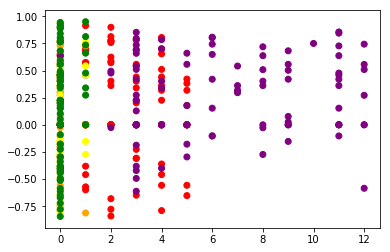

In [11]:
plt.scatter(media_df["Date"], media_df["Compound"], c = media_df["Color"], cmap="jet")
plt.show()

In [15]:
media_df_grouped = media_df.groupby("Media")["Compound"].mean()
media_df_grouped

Media
@BBC        0.177656
@CBSNews    0.064537
@CNN       -0.086987
@Fox        0.257156
@nytimes    0.126849
Name: Compound, dtype: float64

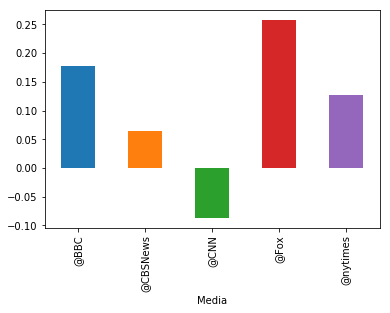

In [16]:
media_df_grouped.plot(kind="bar")

### Test 2. Count articles after 12 hrs from the last article

In [184]:
media_daily_df = pd.DataFrame({
    "Media": [],
    "Date": [],
    "Text": [],
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []    
})
media_daily_df

,Compound,Date,Media,Negative,Neutral,Positive,Text


In [185]:
target_media = ["@BBC", "@CBSNews", "@CNN", "@Fox", "@nytimes"]

In [186]:
# Set index with a variable 'counter'
counter = 1

# Grab 25 tweets
for target_term in target_media:
    public_tweets = api.user_timeline(target_term, count=1000)
    latest_tweet = public_tweets[0]["created_at"]
    latest_date = datetime.datetime.strptime(latest_tweet, "%a %b %d %H:%M:%S +0000 %Y")
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        day = tweet["created_at"]
        tweet_date = datetime.datetime.strptime(day, "%a %b %d %H:%M:%S +0000 %Y")
        
        if tweet_date < latest_date:
            # Create a row by adding media name
            media_daily_df.loc[counter, "Media"] = target_term

            # Add Tweet text
            media_daily_df.loc[counter, "Text"] = tweet["text"]

            # Add Date
            media_daily_df.loc[counter, "Date"] = tweet["created_at"]

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])

            # Add each value to the appropriate array
            media_daily_df.loc[counter, "Compound"] = results["compound"]
            media_daily_df.loc[counter, "Negative"] = results["neg"]
            media_daily_df.loc[counter, "Positive"] = results["pos"]
            media_daily_df.loc[counter, "Neutral"] = results["neu"]

            # Add row
            counter += 1
            
            # subtract 1 day from latest_date
            latest_date -= timedelta(hours=12)

In [187]:
media_daily_df = media_daily_df[["Media", "Date", "Text", "Compound", "Positive", "Negative", "Neutral"]]
media_daily_df

,Media,Date,Text,Compound,Positive,Negative,Neutral
1,@BBC,Sun Jun 10 18:02:27 +0000 2018,Can we interest you in a little cockroach milk...,0.4588,0.120,0.000,0.880
2,@BBC,Sun Jun 10 07:03:02 +0000 2018,This elderly man was struggling slowly across ...,0.9134,0.442,0.067,0.491
3,@BBC,Sat Jun 09 19:02:05 +0000 2018,What is it like being Germaine Greer? This obs...,0.3612,0.122,0.000,0.878
4,@BBC,Fri Jun 08 20:04:03 +0000 2018,"🎶 Tonight, @ArcticMonkeys perform live for @BB...",0.0000,0.000,0.000,1.000
5,@BBC,Fri Jun 08 18:09:05 +0000 2018,💃🕺 Why does dancing with our friends make us f...,0.7809,0.383,0.000,0.617
6,@BBC,Fri Jun 08 07:00:18 +0000 2018,🌊💙 A message from Sir David Attenborough for #...,0.0000,0.000,0.000,1.000
7,@BBC,Thu Jun 07 18:00:21 +0000 2018,❤️️ Harry has been wearing a Spider-Man mask d...,0.0000,0.000,0.000,1.000
8,@BBC,Thu Jun 07 07:01:05 +0000 2018,❤️🐶 Some heroes don't wear capes - they wear c...,0.5106,0.268,0.000,0.732
9,@BBC,Wed Jun 06 19:03:03 +0000 2018,"Tonight, #OurGirl actress @michkeegan uncovers...",0.0000,0.000,0.000,1.000
10,@BBC,Wed Jun 06 07:04:04 +0000 2018,📻🐫🦅🐼🦈 @GregJames has got a new co-host!\n\nSir...,0.0000,0.000,0.000,1.000


In [239]:
# Convert Date to Tweet Ago

tweeted_ago = []
for date in media_daily_df["Date"]:
    tweeted_time = datetime.datetime.strptime(date, "%a %b %d %H:%M:%S +0000 %Y")
    tweeted_ago.append(tweeted_time)

tweeted_ago

[datetime.datetime(2018, 6, 10, 18, 2, 27),
 datetime.datetime(2018, 6, 10, 7, 3, 2),
 datetime.datetime(2018, 6, 9, 19, 2, 5),
 datetime.datetime(2018, 6, 8, 20, 4, 3),
 datetime.datetime(2018, 6, 8, 18, 9, 5),
 datetime.datetime(2018, 6, 8, 7, 0, 18),
 datetime.datetime(2018, 6, 7, 18, 0, 21),
 datetime.datetime(2018, 6, 7, 7, 1, 5),
 datetime.datetime(2018, 6, 6, 19, 3, 3),
 datetime.datetime(2018, 6, 6, 7, 4, 4),
 datetime.datetime(2018, 6, 5, 19, 2, 5),
 datetime.datetime(2018, 6, 5, 7, 0, 11),
 datetime.datetime(2018, 6, 4, 19, 3, 2),
 datetime.datetime(2018, 6, 4, 7, 0, 15),
 datetime.datetime(2018, 6, 3, 19, 2, 6),
 datetime.datetime(2018, 6, 3, 7, 4, 3),
 datetime.datetime(2018, 6, 2, 19, 2, 5),
 datetime.datetime(2018, 6, 1, 19, 6, 4),
 datetime.datetime(2018, 6, 1, 18, 1, 7),
 datetime.datetime(2018, 6, 1, 7, 0, 15),
 datetime.datetime(2018, 5, 31, 19, 2, 2),
 datetime.datetime(2018, 5, 30, 19, 2, 5),
 datetime.datetime(2018, 5, 30, 18, 3, 4),
 datetime.datetime(2018, 6, 11,

In [251]:
color = []
for media in media_daily_df["Media"]:
    if media == "@BBC":
        color.append("Red")
    elif media == "@CBSNews":
        color.append("Orange")
    elif media == "@CNN":
        color.append("Yellow")
    elif media == "@Fox": 
        color.append("Purple")
    else:
        color.append("Green")

media_daily_df["Color"] = color
media_daily_df

c:\users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Media,Date,Text,Compound,Positive,Negative,Neutral,Color
1,@BBC,Sun Jun 10 18:02:27 +0000 2018,Can we interest you in a little cockroach milk...,0.4588,0.120,0.000,0.880,Red
2,@BBC,Sun Jun 10 07:03:02 +0000 2018,This elderly man was struggling slowly across ...,0.9134,0.442,0.067,0.491,Red
3,@BBC,Sat Jun 09 19:02:05 +0000 2018,What is it like being Germaine Greer? This obs...,0.3612,0.122,0.000,0.878,Red
4,@BBC,Fri Jun 08 20:04:03 +0000 2018,"🎶 Tonight, @ArcticMonkeys perform live for @BB...",0.0000,0.000,0.000,1.000,Red
5,@BBC,Fri Jun 08 18:09:05 +0000 2018,💃🕺 Why does dancing with our friends make us f...,0.7809,0.383,0.000,0.617,Red
6,@BBC,Fri Jun 08 07:00:18 +0000 2018,🌊💙 A message from Sir David Attenborough for #...,0.0000,0.000,0.000,1.000,Red
7,@BBC,Thu Jun 07 18:00:21 +0000 2018,❤️️ Harry has been wearing a Spider-Man mask d...,0.0000,0.000,0.000,1.000,Red
8,@BBC,Thu Jun 07 07:01:05 +0000 2018,❤️🐶 Some heroes don't wear capes - they wear c...,0.5106,0.268,0.000,0.732,Red
9,@BBC,Wed Jun 06 19:03:03 +0000 2018,"Tonight, #OurGirl actress @michkeegan uncovers...",0.0000,0.000,0.000,1.000,Red
10,@BBC,Wed Jun 06 07:04:04 +0000 2018,📻🐫🦅🐼🦈 @GregJames has got a new co-host!\n\nSir...,0.0000,0.000,0.000,1.000,Red


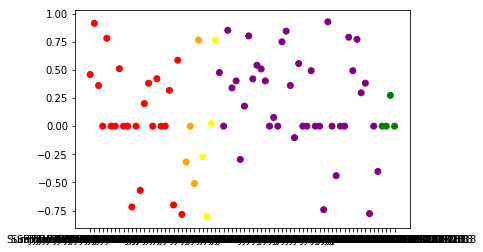

In [253]:
plt.scatter(media_daily_df["Date"], media_daily_df["Compound"], c = media_daily_df["Color"], cmap="jet")

plt.show()

### Test 3. Retrieve all tweets from a certain time - ???

In [189]:
media_month_df = pd.DataFrame({
    "Media": [],
    "Date": [],
    "Text": [],
    "Compound": [],
    "Positive": [],
    "Negative": [],
    "Neutral": []    
})
media_month_df

,Compound,Date,Media,Negative,Neutral,Positive,Text


In [190]:
target_media = ["@BBC", "@CBSNews", "@CNN", "@Fox", "@nytimes"]

In [ ]:
# Set index with a variable 'counter'
counter = 1

# Grab 25 tweets
for target_term in target_media:
    recent_tweet = api.user_timeline(target_term)
    latest_tweet = recent_tweet["created_at"]
    latest_date = datetime.datetime.strptime(latest_tweet, "%a %b %d %H:%M:%S +0000 %Y") 
    oldest_date = latest_date - timedelta(days=30)
    
    public_tweets = api.user_timeline(target_term, count=1000, since_id=)
    
    # Loop through all tweets
    for tweet in public_tweets:
        
        day = tweet["created_at"]
        tweet_date = datetime.datetime.strptime(day, "%a %b %d %H:%M:%S +0000 %Y")
        
        if tweet_date < latest_date:
            # Create a row by adding media name
            media_month_df.loc[counter, "Media"] = target_term

            # Add Tweet text
            media_month_df.loc[counter, "Text"] = tweet["text"]

            # Add Date
            media_month_df.loc[counter, "Date"] = tweet["created_at"]

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])

            # Add each value to the appropriate array
            media_month_df.loc[counter, "Compound"] = results["compound"]
            media_month_df.loc[counter, "Negative"] = results["neg"]
            media_month_df.loc[counter, "Positive"] = results["pos"]
            media_month_df.loc[counter, "Neutral"] = results["neu"]

            # Add row
            counter += 1
            
            # subtract 1 day from latest_date
            latest_date -= timedelta(hours=12)

In [ ]:
media_month_df = media_daily_df[["Media", "Date", "Text", "Compound", "Positive", "Negative", "Neutral"]]
media_month_df